# Identify Exposure to Flood using Geospatial Mapping

![Flood Raster Image](flood_projection.png)

## 1. Introduction

This study exlores the use of geospatial mapping in an attempt to assess flood exposure. The objective is to learn how geospatial data from various sources can be layered onto base maps to identify exposure to flood.

While the use of geospatial analysis is currently beyond the typical scope for life insurers, the skills gained from this approach could be valuable in other areas that could be relevant (eg risk management, climate risk etc)

The outcome of this study is to have a list of location (of interest) with their associated flood information - and a map to visualised their exposure to flood.

## 2. The Data

- **Flood Data - Historical**

  The historical flood data were obtained from the Department of Irrigation and Drainage annual report - which contains the location of flood together with its coordinate. For our study, we have taken the flood data in Kuala Lumpur for the year 2020 and 2021.

  The data is stored in excel format.


- **Flood Data - Projection**

  The flood projection data used in this analysis is sourced from the Aqueduct Floods Hazard Maps—an online platform that measures riverine and coastal flood risks under both current baseline conditions and future projections for the years 2030, 2050, and 2080. These projections cover various climate scenarios (RCP 4.5, RCP 8.5) and flood severity levels.

  While the data is available globally, this report focuses specifically on areas of interest, namely Kelantan and Kuala Lumpur; and only riverine flood risks are considered.

  The data is provided in GeoTIFF format, containing raster information for spatial analysis.


- **River Data**
  
  The location of flood is correlated to its proximity to river - and we have used river data to highlight it on the base map. The river data is extracted from Overpass Turbo using the river ID obtained from openstreetmap.

  The data are stored as geojson format.

- **Point of Interest Data**
  
  For this analysis, we have randomly selected various locations in Kuala Lumpur (the capital city) and Kelantan (a region known for its vulnerability to flooding during the monsoon season). These locations have been geocoded, with coordinates obtained from Google Maps.

  In real application, point of interest data could represent the location of insured business/person, office branches location etc. 

  The data is stored in excel format.


## 3. Setting the Base Map

In this study - we will be using the map of Kuala Lumpur and Kelantan. The base map can be set using folium package library.

In [1]:
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from folium.raster_layers import ImageOverlay
from folium.plugins import MarkerCluster
import folium
import pandas as pd
from geopy.distance import geodesic

import geopandas as gpd
from rasterstats import point_query

In [2]:
# Initial coordinate to display
init_longitude = 102.28035439823157
init_latitude = 6.105408613360123 - 0.25

# Initialize the map centered around Kuala Lumpur with a starting zoom level
m_kelantan = folium.Map(location=[init_latitude, init_longitude], zoom_start=9.5, tiles="OpenStreetMap")

# Show map
print("Kelantan base map:")
m_kelantan

Kelantan base map:


In [3]:
# Initial coordinate to display
init_longitude = 101.69612
init_latitude = 3.13935

# Initialize the map centered around Kuala Lumpur with a starting zoom level
m_kl = folium.Map(location=[init_latitude, init_longitude], zoom_start=14, tiles="OpenStreetMap")

# Show map
print("Kuala Lumpur base map:")
m_kl


Kuala Lumpur base map:


## 4. Marking the Point of Interest

Now that we have the base map, we can then layered our point of interest based on their coordinate.

In [4]:
# Load the point of interest (POI) geodata
poi_data_path = ( r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\data_pointOfInterest.xlsx")
poi_df_kelantan = pd.read_excel(poi_data_path, sheet_name="Kelantan")

# Add client's longitude and latitude
poi_df_kelantan[["Latitude", "Longitude"]] = (
    poi_df_kelantan["Coordinate"].str.split(", ", expand=True).astype(float)
)

poi_layer = folium.FeatureGroup(name="POI Location").add_to(m_kelantan)

# Add client locations and highlight those within 500m of a flood point
for i, poi_row in poi_df_kelantan.iterrows():
    poi_location = (poi_row["Latitude"], poi_row["Longitude"])

    folium.Marker(
        location=[poi_row["Latitude"], poi_row["Longitude"]],
        popup=f"POI Location: {poi_row['Branch Name']}",
        icon=folium.Icon(
            color="orange", icon="info-sign"
        ),
    ).add_to(poi_layer)

# Save the map with the time slider and markers
print("Point of Interest - Kelantan:")
print(poi_df_kelantan)
m_kelantan

Point of Interest - Kelantan:
     Branch Name                              Coordinate  Latitude   Longitude
0     Kota Bharu   6.127871368201371, 102.24408055067511  6.127871  102.244081
1  Kubang Kerian  6.0972102273295485, 102.28159643476025  6.097210  102.281596
2      Pasir Mas   6.121357179892286, 102.21920167145332  6.121357  102.219202
3    Pasir Puteh   5.836473021457399, 102.40614850430987  5.836473  102.406149
4        Ketereh   5.922737868543502, 102.23636227476517  5.922738  102.236362
5         Jerteh   5.738325145592923, 102.49568918271507  5.738325  102.495689
6    Kota Putera  5.7983367024180135, 102.56486582288585  5.798337  102.564866
7        Jelawat   6.012717860098982, 102.38317058030903  6.012718  102.383171


In [5]:
# Load the point of interest (POI) geodata
poi_df_kl = pd.read_excel(poi_data_path, sheet_name="KL")

# Add client's longitude and latitude
poi_df_kl[["Latitude", "Longitude"]] = (
    poi_df_kl["Coordinate"].str.split(", ", expand=True).astype(float)
)

poi_layer = folium.FeatureGroup(name="POI Location").add_to(m_kl)

# Add client locations and highlight those within 500m of a flood point
for i, poi_row in poi_df_kl.iterrows():
    poi_location = (poi_row["Latitude"], poi_row["Longitude"])

    folium.Marker(
        location=[poi_row["Latitude"], poi_row["Longitude"]],
        popup=f"POI Location: {poi_row['Branch Name']}",
        icon=folium.Icon(
            color="orange", icon="info-sign"
        ),
    ).add_to(poi_layer)

# Save the map with the time slider and markers
print("Point of Interest - Kuala Lumpur:")
print(poi_df_kl)
m_kl

Point of Interest - Kuala Lumpur:
                                          Branch Name  \
0   Jalan Tun H.S. Lee,92, Jalan Tun H.S. Lee, Kua...   
1   Jalan Raja Laut,Menara DBKL 2, Jalan Raja Laut...   
2   Kompleks Dayabumi,City Point, Dayabumi Complex...   
3    Kepong,Jalan 53, Desa Jaya, Kepong, Kuala Lumpur   
4   Jalan Tun Razak,Bangunan UTM SPACE, Jalan Tun ...   
5   Jinjang,Jalan 2/32, Off 6 1/2 Mile, Jalan Kepo...   
6   Taman Segar,Jalan Manis Enam, Taman Segar, Kua...   
7   Desa Pandan,Jalan 3/76D, Desa Pandan, Kuala Lu...   
8   Alam Damai,Jalan Alam Damai 1, Cheras, Kuala L...   
9   Kompleks Bandar,Jalan Mega Mendong, Bandar Par...   
10      KLCC,Suria KLCC, KL City Centre, Kuala Lumpur   
11  Taman Cheras Makmur,Jalan Kaskas 1, Batu 6, Ja...   
12  Sri Petaling,Jalan Radin Anum, Bandar Baru Ser...   
13  Menara Perkeso,Menara Perkeso, No. 281, Jalan ...   
14  Technology Park Malaysia,Lebuhraya Puchong – S...   
15           Menara PNB,Jalan Tun Razak, Kuala Lumpur 

## 5. Layering Flood Projection Models On the Base Map

- 5 different models is considered, summarised in the table below:


  |Model No|Model Name                                     |Scenario|Severeity |Proj Year|
  |--------|-----------------------------------------------|--------|----------|---------|
  | 1      |Norwegian Met Institute (NOR)                  |RCP 4.5 |1-in-2    |2050     |
  | 2      |Geophysical Fluid Dynamics Laboratory (GFDL)   |RCP 4.5 |1-in-2    |2050     |
  | 3      |Met Office Hadley Centre  (HAD)                |RCP 4.5 |1-in-2    |2050     |
  | 4      |Institut Pierre Simon Laplace (IPSL)           |RCP 4.5 |1-in-2    |2050     |
  | 5      |Atmosphere and Ocean Research Institute (MIROC)|RCP 4.5 |1-in-2    |2050     |

### Generating Raster Plot
- We will first read the geotiff data and plot the raster value on a black canvas. This way we can clearly see the color range without being obstructed by the base map.

- We have chosen to plot the raster value on cool-warm color scale (cooler blue-ish color represent lower flood depth, and warmer red-ish color represent higher flood depth).

- We have also lowered the maximum range of the raster value to 0.05. This value is chosen after considering our location of interest (in kelantan populated area) have quite a small projected flood depth value. By lowering the range, it is easier to compare the impact of various flood models on our area of interest (as they can be marked in different color scale).

In [6]:
model1_tiff = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\projection\inunriver_rcp4p5_00000NorESM1-M_2050_rp00002.tif"
model2_tiff = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\projection\inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00002.tif"
model3_tiff = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\projection\inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00002.tif"
model4_tiff = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\projection\inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00002.tif"
model5_tiff = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\projection\inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00002.tif"

model1_name = "NOR_RCP4p5_1i2_2050"
model2_name = "GFDL_RCP4p5_1i2_2050"
model3_name = "HAD_RCP4p5_1i2_2050"
model4_name = "IPSL_RCP4p5_1i2_2050"
model5_name = "MIROC_RCP4p5_1i2_2050"

# Define the bounding box for Malaysia
malaysia_bbox = {
    "left": 99.60,  # Longitude of the left (west) boundary
    "bottom": 0.85,  # Latitude of the bottom (south) boundary
    "right": 119.30,  # Longitude of the right (east) boundary
    "top": 7.50,  # Latitude of the top (north) boundary
}

east_coast_bbox = {
    "left": 102.0,    # Longitude of the left (west) boundary
    "bottom": 3.0,    # Latitude of the bottom (south) boundary
    "right": 104.5,   # Longitude of the right (east) boundary
    "top": 6.5        # Latitude of the top (north) boundary
}

used_bbox = east_coast_bbox

def process_raster(tiff_file, model_name, max_val):
    # Set the model name
    model_name = model_name

    # Open TIFF File
    with rasterio.open(tiff_file) as dataset:
        # Convert the bounding box to pixel coordinates (window)
        window = from_bounds(
            used_bbox["left"],
            used_bbox["bottom"],
            used_bbox["right"],
            used_bbox["top"],
            transform=dataset.transform,
        )

        # Read the windowed data
        window_data = dataset.read(1, window=window)

        # Check the range of values to better understand the data
        min_value = np.min(window_data)
        max_value = np.max(window_data)
        print(f"Data range for {model_name}: Min = {min_value}, Max = {max_value}")

        # Adjust the range for visualization (e.g., focus on depths between 0-10 meters)
        vmin, vmax = (
            0,
            max_val, #for kelantan urban, we adjust to 0.05 since most value dosent exceed this. otherwise all model show similar color
        )

        # Mask out no-data areas or irrelevant data (e.g., ocean, null values)
        # Irrelevant area is marked as -9999, whereas no flood is marked as 0. So we masked those value from 0 or less.
        masked_data = np.ma.masked_where(
            window_data <= 0, window_data
        ) 

        # Create a figure and axis
        fig, ax = plt.subplots()

        # Use the Blues color map (goes from light blue to dard blue)
        cax = ax.imshow(masked_data, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        ax.set_visible(False)
        cbar = fig.colorbar(cax, orientation='horizontal')
        cbar.set_label("Flood Depth (m)")
        plt.show()

        # Save the image to overlay with other maps
        plt.imsave(f"flood_projection_{model_name}.png", masked_data, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        plt.close()

        # show the saved image
        flood_proj_img = mpimg.imread(f"flood_projection_{model_name}.png")
        # Create a figure with a specified size (in inches)
        fig, ax = plt.subplots(figsize=(10*2, 8*2), facecolor='black')
        ax.imshow(flood_proj_img)
        # ax.set_facecolor('black')
        ax.axis('off')
        plt.show()
        plt.close()


Data range for NOR_RCP4p5_1i2_2050: Min = -9999.0, Max = 0.1520218551158905


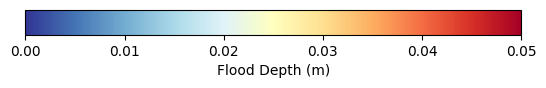

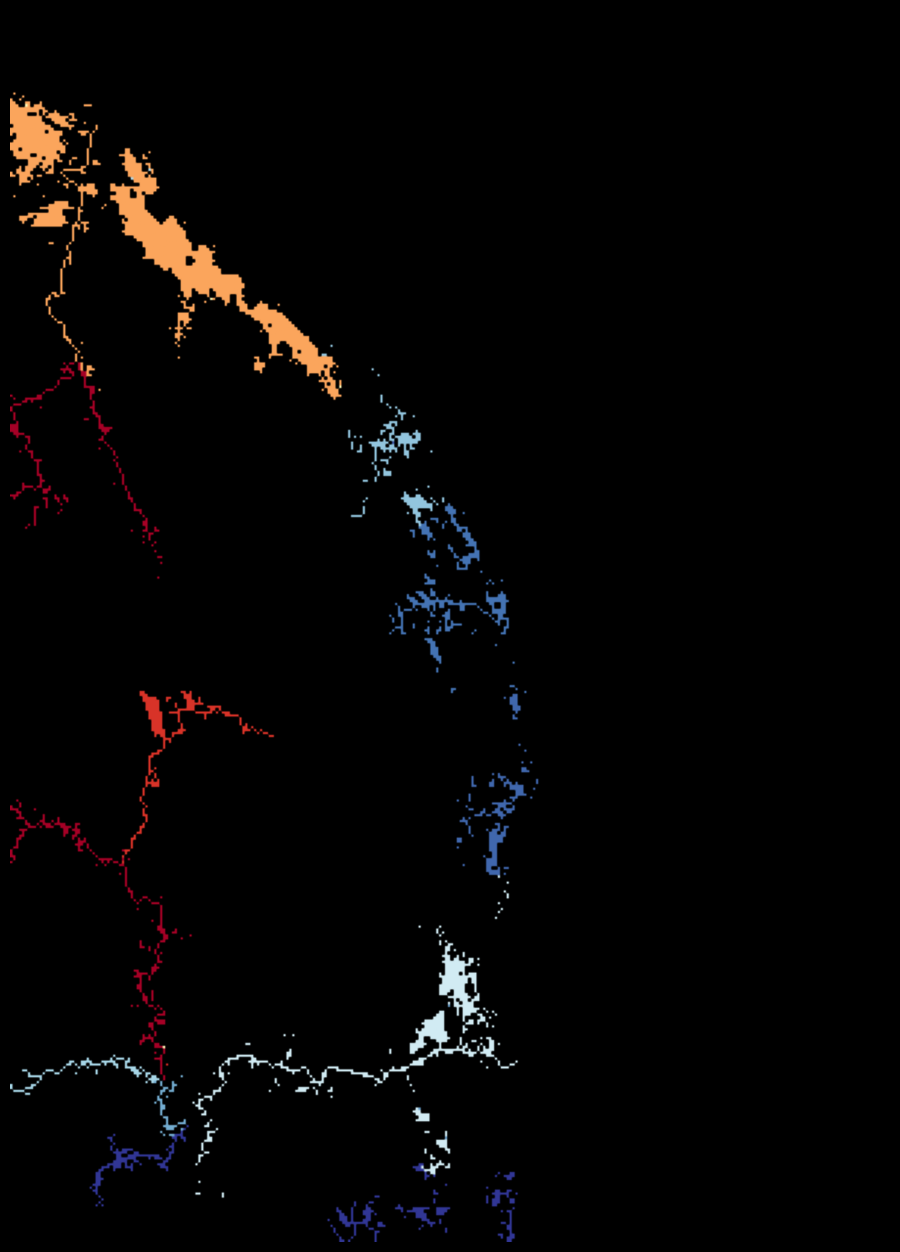

Data range for GFDL_RCP4p5_1i2_2050: Min = -9999.0, Max = 0.2818704843521118


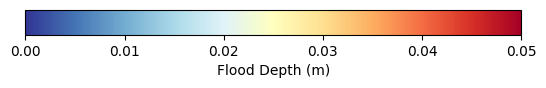

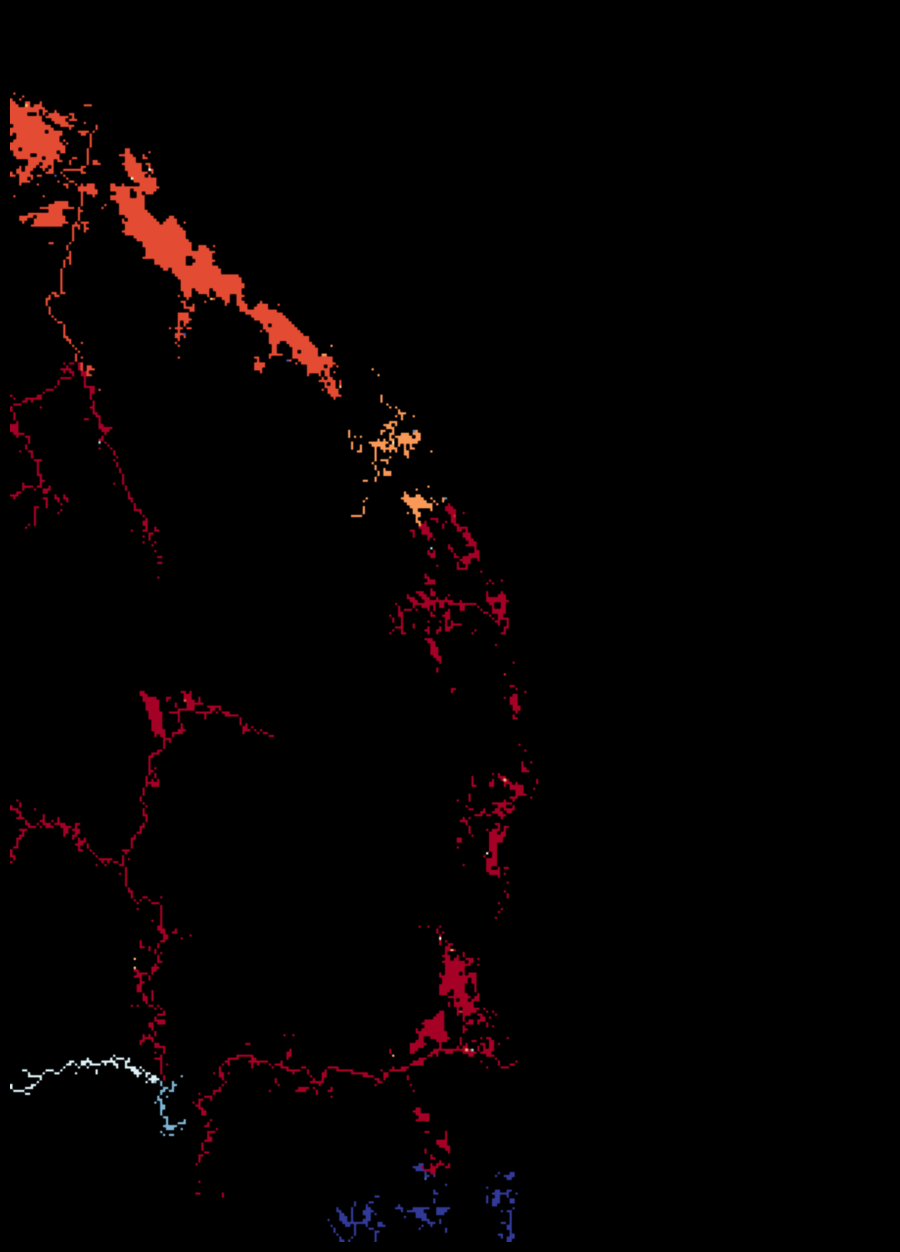

Data range for HAD_RCP4p5_1i2_2050: Min = -9999.0, Max = 0.014680466614663601


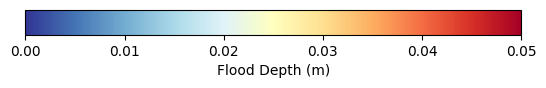

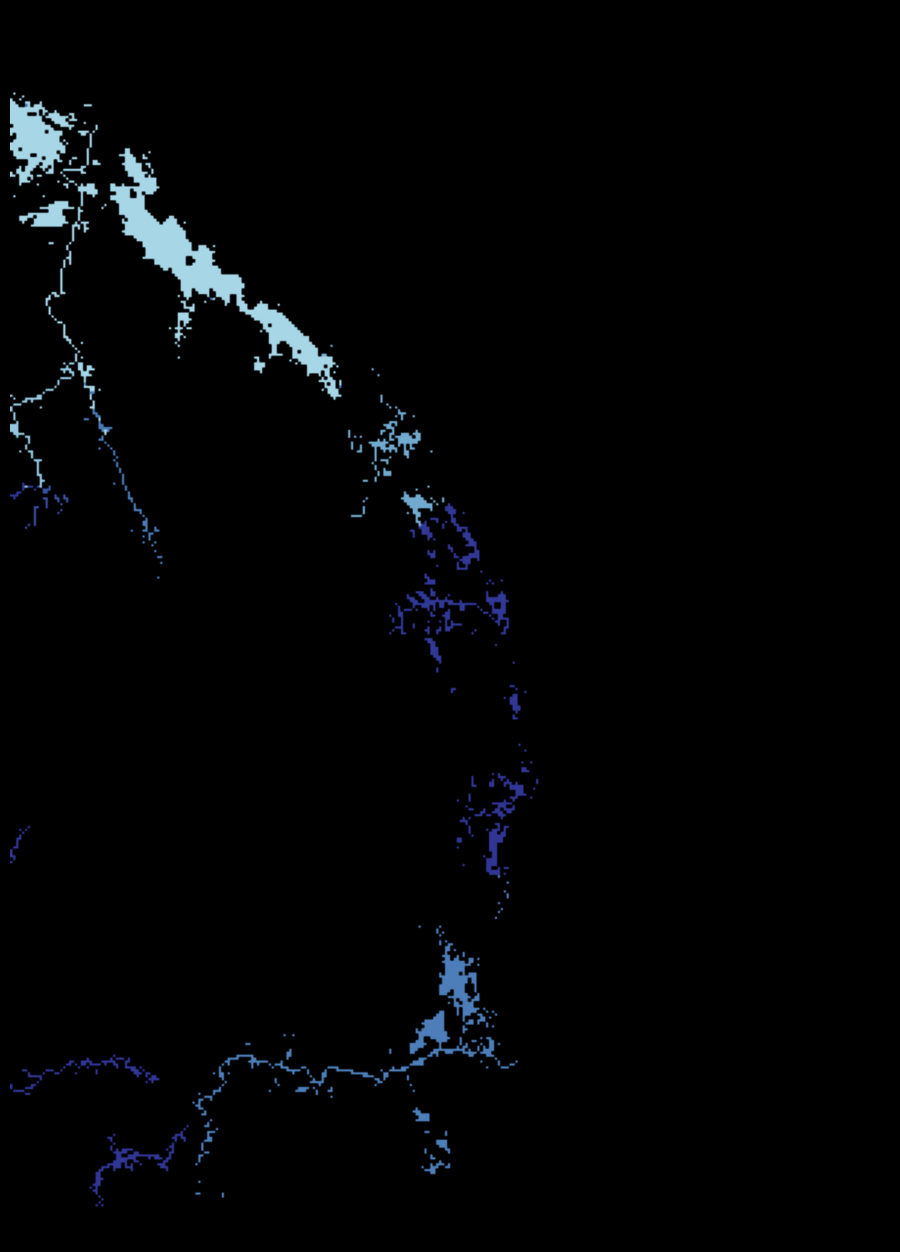

Data range for IPSL_RCP4p5_1i2_2050: Min = -9999.0, Max = 0.33417683839797974


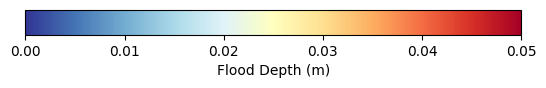

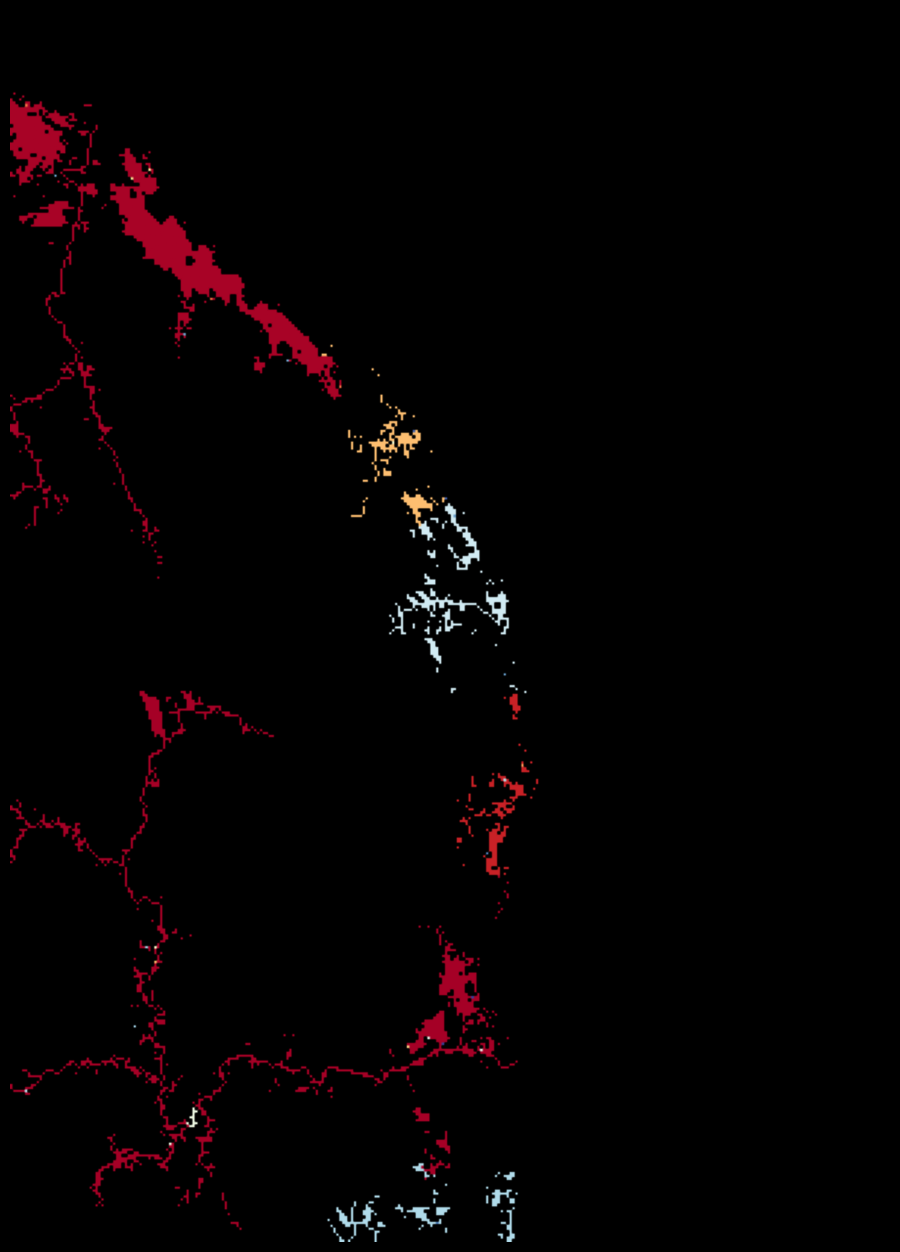

Data range for MIROC_RCP4p5_1i2_2050: Min = -9999.0, Max = 0.02748878300189972


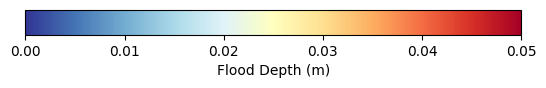

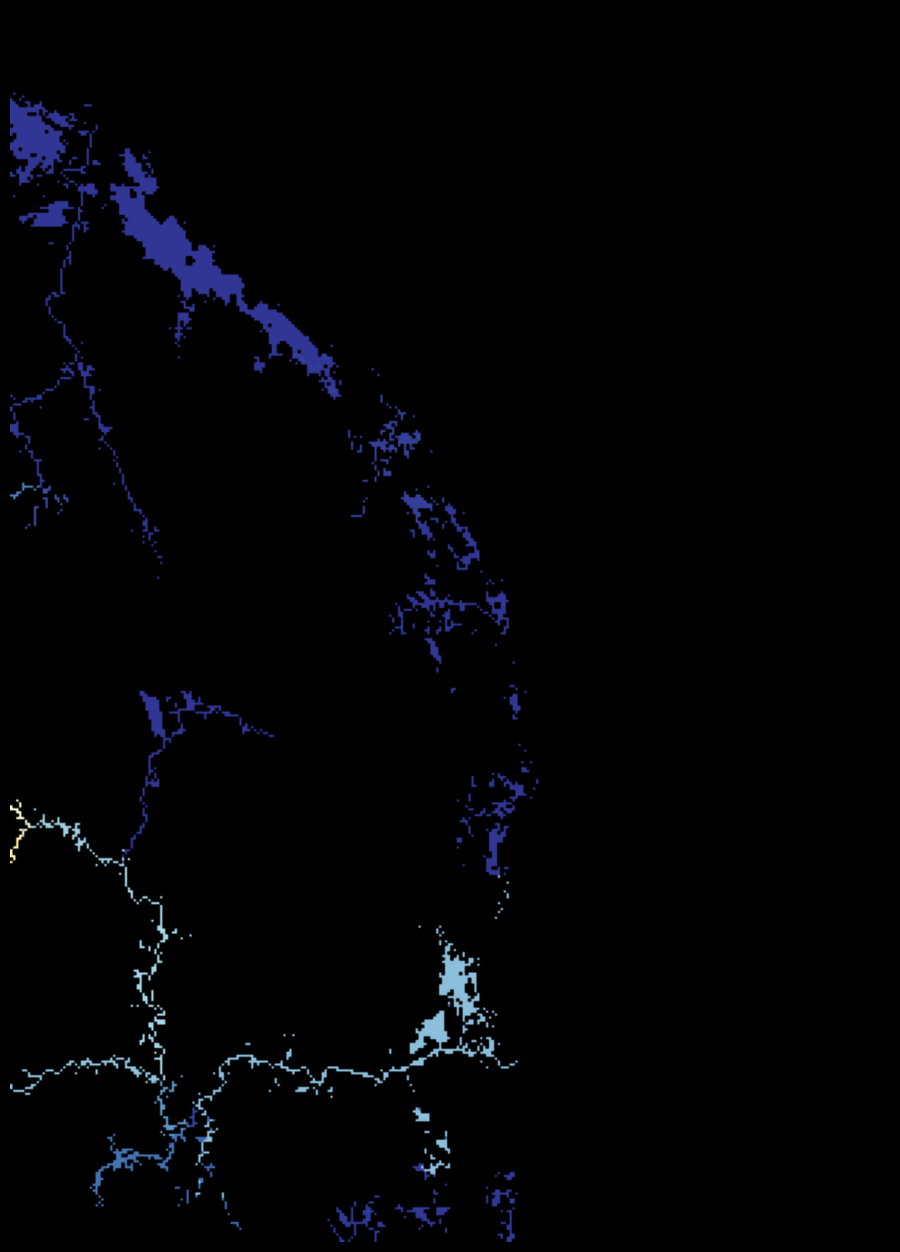

In [7]:
process_raster(model1_tiff,model1_name,0.05)
process_raster(model2_tiff,model2_name,0.05)
process_raster(model3_tiff,model3_name,0.05)
process_raster(model4_tiff,model4_name,0.05)
process_raster(model5_tiff,model5_name,0.05)

The raster images above shows that the most severe projected flood comes from Institut Pierre Simon Laplace's model (red color plot), with the least severe projection comes from Met Office Hadley Centre's model.

We can confirm this observation after compiling the flood exposure dataset that includes the raster value information from these models

### Compiling the Exposure Dataset

We can combine the point of interest in Kelantan data with flood projection raster value by performing spatial join operation. The results are shown in the table below:

In [8]:
def spatial_join(left_df,tiff_file,model_name):

    # Step 1: Load the GeoTIFF file to combine using rasterio
    raster = rasterio.open(tiff_file)

    # Step 2: Convert the left table to GeoPandas
    if not isinstance(left_df, gpd.GeoDataFrame):
        left_gdf = gpd.GeoDataFrame(
            left_df, 
            geometry=gpd.points_from_xy(left_df['Longitude'], left_df['Latitude']),
            crs="EPSG:4326"  # Assuming your data uses WGS 84
        )
    else:
        left_gdf = left_df

    # Step 3: Reproject the left data to match the CRS of the GeoTIFF
    # Check if the CRS matches
    if left_gdf.crs != raster.crs:
        left_gdf = left_gdf.to_crs(raster.crs)

    # Step 4: Extract the raster values at each client point using point_query
    # This will give you the pixel value (or None if outside the raster)
    col_name = f'{model_name}_raster_value'
    left_gdf[col_name] = point_query(left_gdf.geometry, tiff_file)

    return left_gdf

exposure_table_kelantan = spatial_join(poi_df_kelantan,model1_tiff,model1_name)
exposure_table_kelantan = spatial_join(exposure_table_kelantan,model2_tiff,model2_name)
exposure_table_kelantan = spatial_join(exposure_table_kelantan,model3_tiff,model3_name)
exposure_table_kelantan = spatial_join(exposure_table_kelantan,model4_tiff,model4_name)
exposure_table_kelantan = spatial_join(exposure_table_kelantan,model5_tiff,model5_name)

print("Flood Exposure Table for Kelantan:")
print(exposure_table_kelantan)


Flood Exposure Table for Kelantan:
     Branch Name                              Coordinate  Latitude  \
0     Kota Bharu   6.127871368201371, 102.24408055067511  6.127871   
1  Kubang Kerian  6.0972102273295485, 102.28159643476025  6.097210   
2      Pasir Mas   6.121357179892286, 102.21920167145332  6.121357   
3    Pasir Puteh   5.836473021457399, 102.40614850430987  5.836473   
4        Ketereh   5.922737868543502, 102.23636227476517  5.922738   
5         Jerteh   5.738325145592923, 102.49568918271507  5.738325   
6    Kota Putera  5.7983367024180135, 102.56486582288585  5.798337   
7        Jelawat   6.012717860098982, 102.38317058030903  6.012718   

    Longitude                   geometry  NOR_RCP4p5_1i2_2050_raster_value  \
0  102.244081  POINT (102.24408 6.12787)                          0.000000   
1  102.281596   POINT (102.2816 6.09721)                          0.000000   
2  102.219202   POINT (102.2192 6.12136)                          0.000000   
3  102.406149  POINT (

- From the table above, we can see that the raster value for IPSL model is the highest (value=0.049471), with HAD model being being he lowest (0.000091).


- We can also see from the table that 4 out of the 8 locations falls within the projected flooded area. This can be easily seen in the map layering later.

### Layering the Flood Projection Raster

Kelantan exposure to flood based on various projection models:



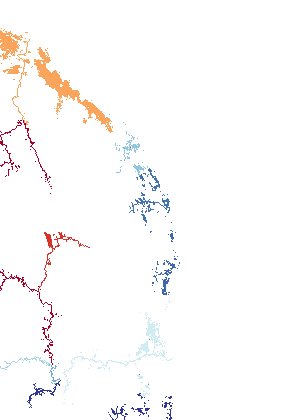
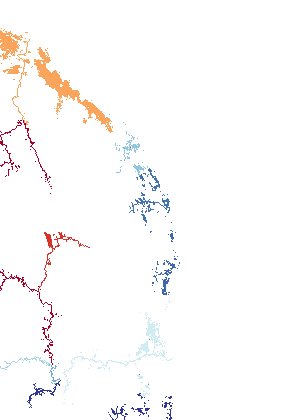
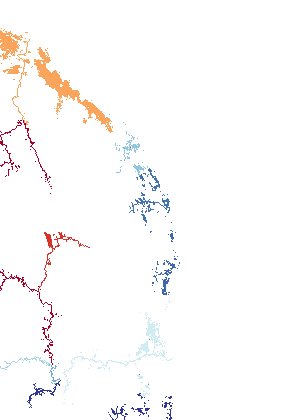
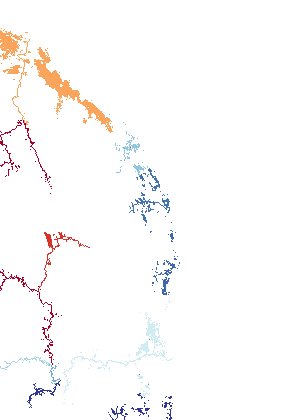
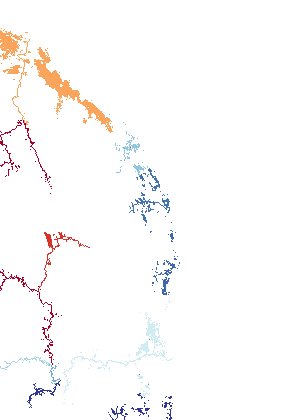
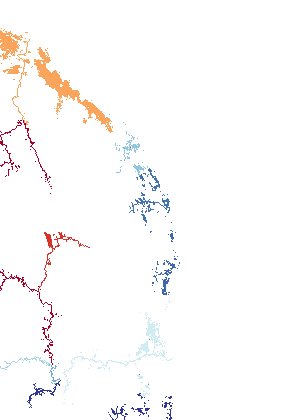
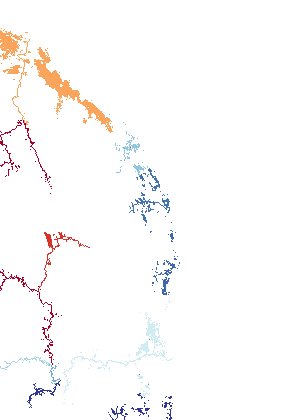
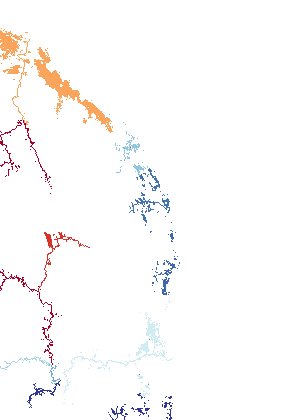
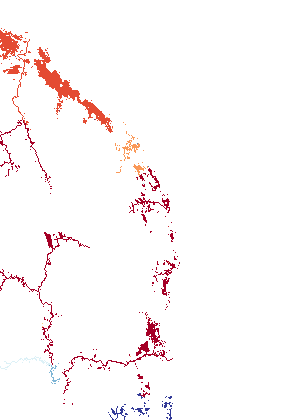
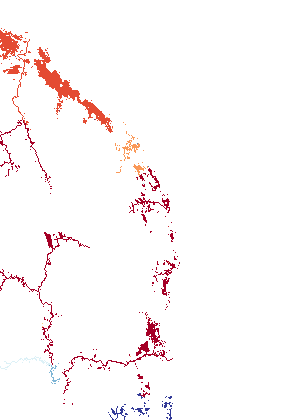
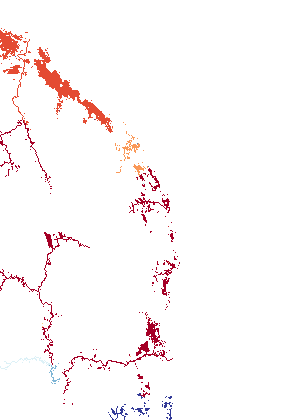
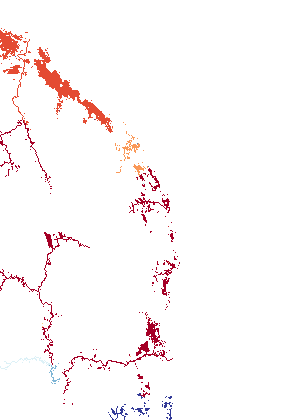
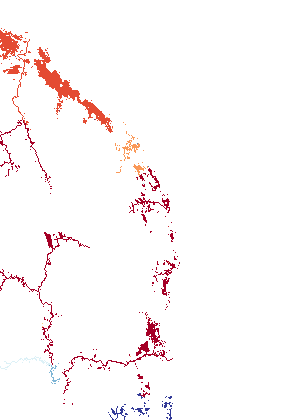
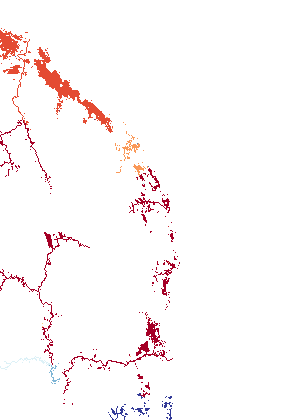
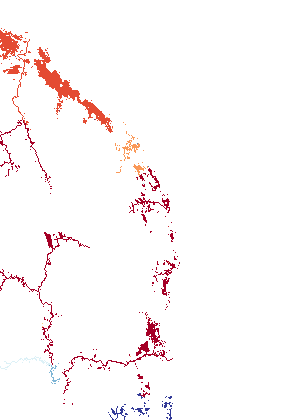
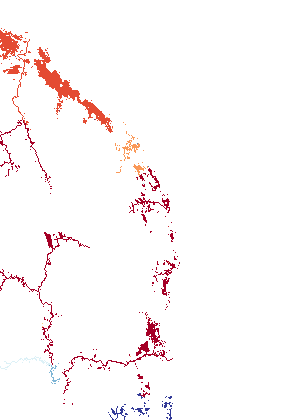
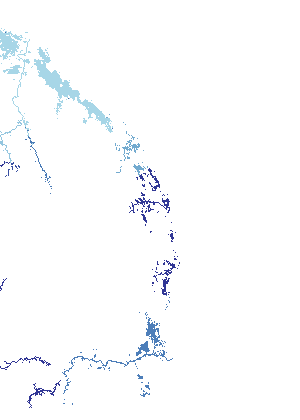
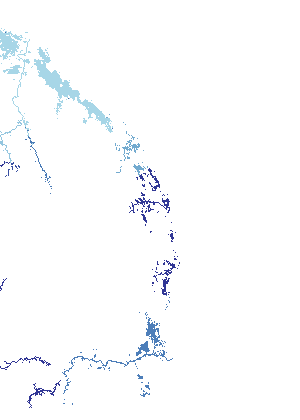
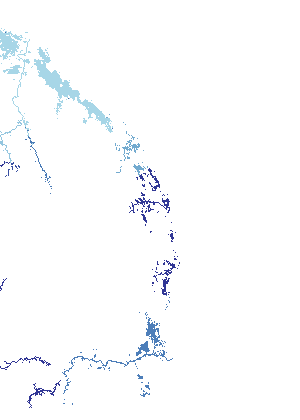
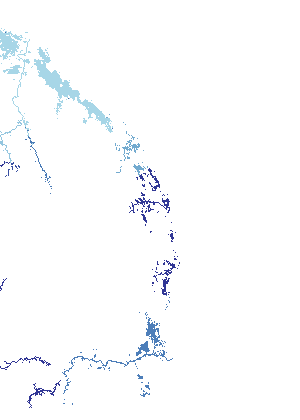
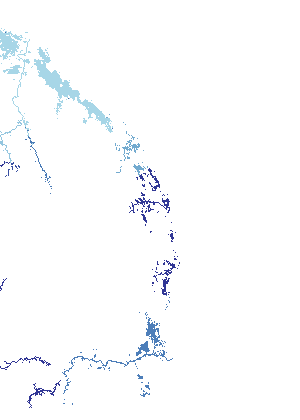
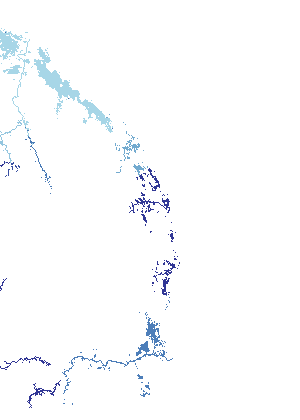
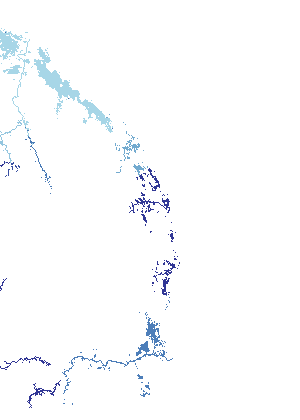
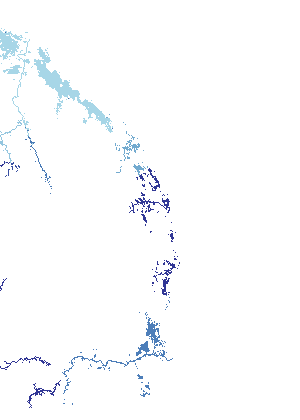
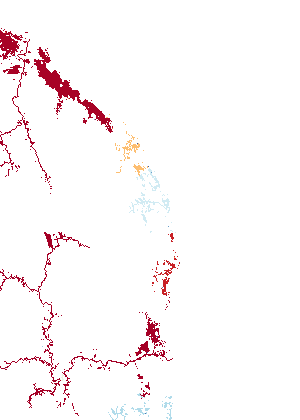
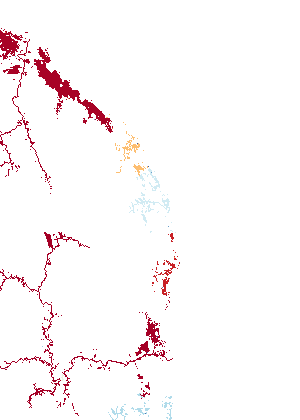
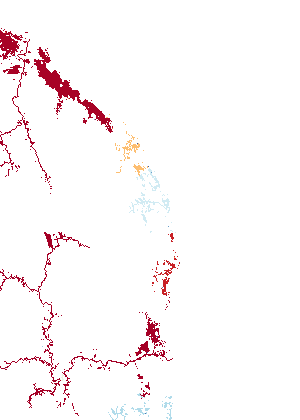
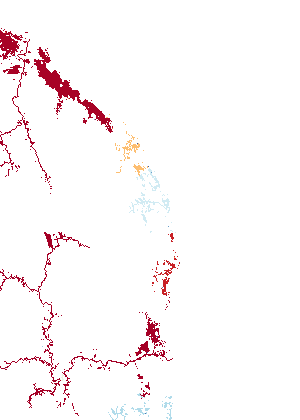
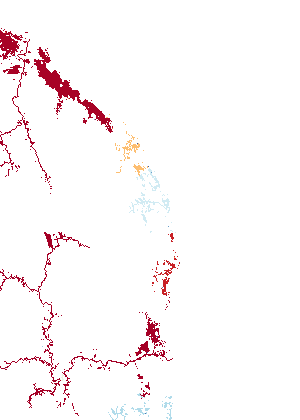
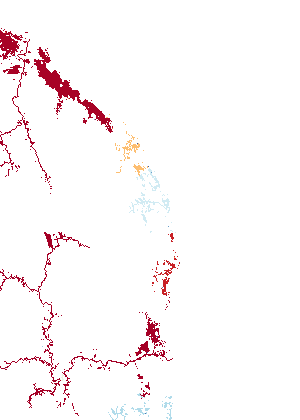
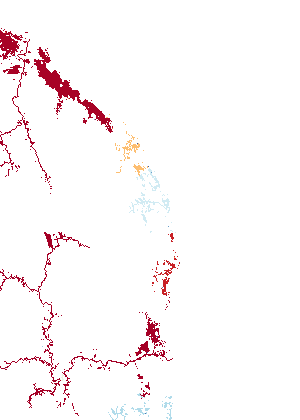
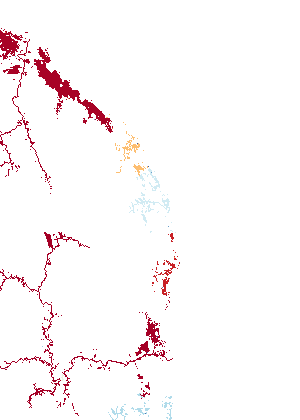
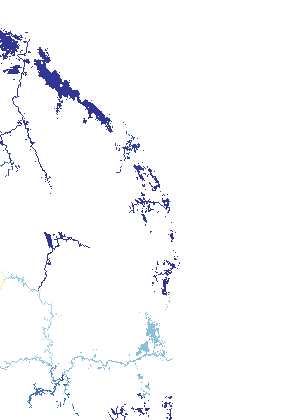
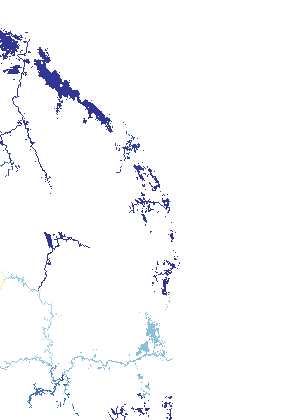
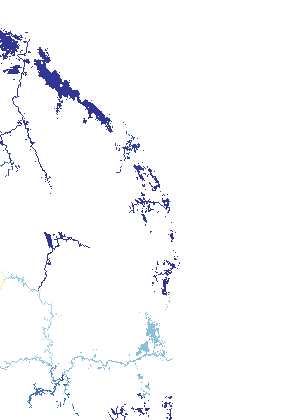
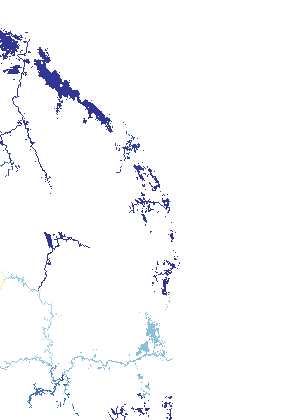
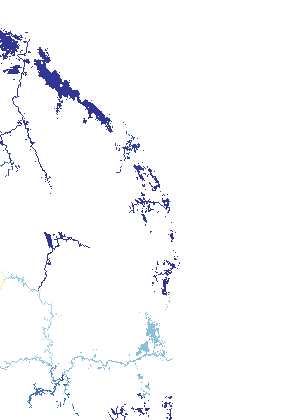
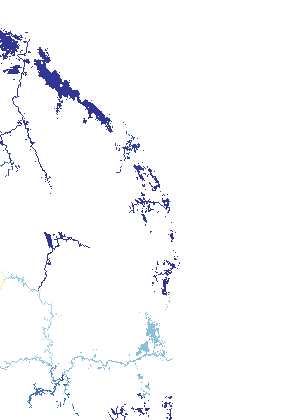
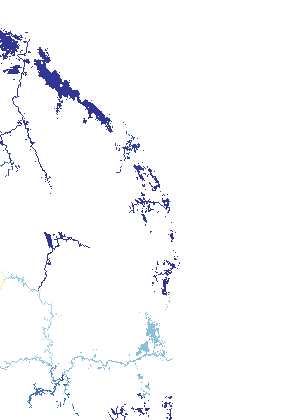
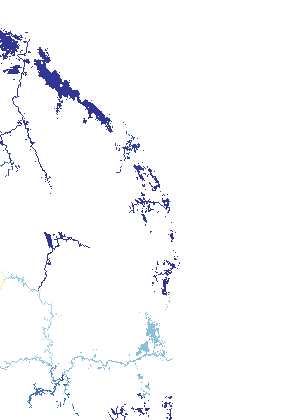

In [9]:

# Define function to add layer
def flood_overlay(image_path,model_name):
    
    # Add the overlay (ImageOverlay) to the map using the geographic bounds
    bounds = [
        [used_bbox["bottom"], used_bbox["left"]],
        [used_bbox["top"], used_bbox["right"]],
    ]

    model_layer = folium.FeatureGroup(name=model_name).add_to(m_kelantan)

    # Add client locations and marked those affected by flood
    for i, poi_row in exposure_table_kelantan.iterrows():

        raster_value = poi_row[f"{model_name}_raster_value"]*100

        if raster_value !=0:
            color = "red"
            popup = f"POI Location: {poi_row['Branch Name']}, Projected Flood Depth: {raster_value:.2f}cm"
        else:
            color = "orange"
            popup = f"POI Location: {poi_row['Branch Name']}, Flood Depth: None"
      
        folium.Marker(
            location=[poi_row["Latitude"], poi_row["Longitude"]],
            popup=popup,
            icon=folium.Icon(
                color=color, icon="info-sign"
            ),
        ).add_to(model_layer)

        ImageOverlay(
            image=image_path,
            bounds=bounds,  # [[south, west], [north, east]] of the image
            opacity=0.1,  # Lower opacity for better map visibility
            name=model_name
        ).add_to(model_layer)

flood_overlay(f"flood_projection_{model1_name}.png",model1_name)
flood_overlay(f"flood_projection_{model2_name}.png",model2_name)
flood_overlay(f"flood_projection_{model3_name}.png",model3_name)
flood_overlay(f"flood_projection_{model4_name}.png",model4_name)
flood_overlay(f"flood_projection_{model5_name}.png",model5_name)
folium.LayerControl().add_to(m_kelantan)
print("Kelantan exposure to flood based on various projection models:")
m_kelantan

# save as html
m_kelantan.save("kelantan_floodExposure.html")

- From the map, we have we can now clearly see the locations that is exposed to the projected flood (marked in red).
- The map is interactive:
    - You can choose to show which flood projection model layer to display by selecting the model in the top right corner of the map.
    - Click on the location of interest to show the name of the location, and the flood depth value.


## 6. Layering Historical Flood Points in KL

### Mapping the flood points

- The following flood location were obtained from the DID annual report for year 2020 and year 2021. Using the avaiable coordinate, we will marked this in our base map for KL.


- Since flood is expected to cover an area rather than a point, we will add a 200m radius around the flood point and assess which of our point of interest location has fallen within the flood area in 2020 and 2021.

In [10]:
# Load the flood incidence data from the Excel file
flood_data_path = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\flood_incidence_kuala_lumpur_expanded.xlsx"
flood_df = pd.read_excel(flood_data_path, sheet_name="Sheet1")
print(flood_df)

                                   Location  Latitude  Longitude  Year
0                    Hospital Pantai Cheras    3.1027   101.7404  2020
1    Jalan Cheras berhadapan EkoCheras Mall    3.0939   101.7395  2020
2           Jalan Melaka – Wisma Lee Rubber    3.1499   101.6970  2020
3             Jalan Cheras – EkoCheras Mall    3.0939   101.7395  2020
4               Kolej Telekom Jalan Semarak    3.1731   101.7152  2020
..                                      ...       ...        ...   ...
96                             Jalan Munshi    3.1543   101.6986  2021
97                               Jalan Dang    3.1563   101.6992  2021
98                          Jalan Raja Laut    3.1566   101.6947  2021
99                          Dataran Merdeka    3.1496   101.6944  2021
100                            Jalan Sultan    3.1566   101.7046  2021

[101 rows x 4 columns]


In [11]:
flood_layer = folium.FeatureGroup(name="Flood Points").add_to(m_kl)
marker_cluster = MarkerCluster().add_to(flood_layer)

# Add flood points and x-meter radius circles
for i, row in flood_df.iterrows():
    
    # Add flood point marker
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Location: {row['Location']}, Flood Year: {row['Year']}",
        icon=folium.Icon(color='blue', icon="cloud"),
        name="Historical Flood Point",
    ).add_to(marker_cluster)

    # Add x-meter radius circle around the flood point
    folium.Circle(
        location=[row["Latitude"], row["Longitude"]],
        radius=200,  # in meters
        color='blue',
        fill=True,
        fill_opacity=0.1,
    ).add_to(flood_layer)

m_kl

Similar to flood exposure analysis in Kelantan, we can also marked our point of interest in KL that falls within 100m of the flood point.

In [12]:
# Function to check if a client falls within x meters of a flood point
def is_within_radius(flood_point, client_point, radius=200):
    distance = geodesic(flood_point, client_point).meters
    return distance <= radius


# Add client locations and highlight those within x meters of a flood point
poi_layer_highlight = folium.FeatureGroup(name="Location Within Flood").add_to(m_kl)
affected_loc = []

for i, poi_row in poi_df_kl.iterrows():
    poi_location = (poi_row["Latitude"], poi_row["Longitude"])
    poi_within_flood_radius = False

    for j, flood_row in flood_df.iterrows():
        flood_location = (flood_row["Latitude"], flood_row["Longitude"])
        if is_within_radius(flood_location, poi_location):
            poi_within_flood_radius = True
            affected_loc.append(poi_row['Branch Name'])
            break

    # Use yellow for clients within flood radius, otherwise orange
    marker_color = "purple" if poi_within_flood_radius else "orange"

    folium.Marker(
        location=[poi_row["Latitude"], poi_row["Longitude"]],
        popup=f"POI Location: {poi_row['Branch Name']}",
        icon=folium.Icon(
            color=marker_color, icon="info-sign"
        ),
    ).add_to(poi_layer_highlight)

print("Location that falls within 100m of flood point.")
print(affected_loc)
# folium.LayerControl().add_to(m_kl)
m_kl

Location that falls within 100m of flood point.
['Jalan Tun H.S. Lee,92, Jalan Tun H.S. Lee, Kuala Lumpur', 'Taman Cheras Makmur,Jalan Kaskas 1, Batu 6, Jalan Cheras, Kuala Lumpur']


### Highlighting the main rivers in KL

- To make it clearer to see the proximity of flood points with the main rivers in KL, we will layer them in the basemap and highlighted them (in purple). The three rivers plotted are the Gombak River, the Klang River and the Batu River.

- From the map below, we can see how a lot of the flood points recoded in 2020 and 2021 is close to the main rivers and the area where two rivers intersect (Batu-Gombak & Klan-Gombak).

In [13]:
# Adding highlights to main river
gombak_river_geojson = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\river\gombak.geojson"
klang_river_geojson = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\river\klang.geojson"
batu_river_geojson = r"C:\Users\ibrah\OneDrive\Documents\Projects\Exploration\geospatial\data\river\batu.geojson"

folium.GeoJson(
    gombak_river_geojson,
    name="Gombak River",
    style_function=lambda x: {
        "color": "purple",
        "weight": 5,
        "fillColor": "cyan",
        "fillOpacity": 0.3,
    },
).add_to(m_kl)

folium.GeoJson(
    klang_river_geojson,
    name="Klang River",
    style_function=lambda x: {
        "color": "purple",
        "weight": 5,
        "fillColor": "cyan",
        "fillOpacity": 0.3,
    },
).add_to(m_kl)

folium.GeoJson(
    batu_river_geojson,
    name="Batu River",
    style_function=lambda x: {
        "color": "purple",
        "weight": 5,
        "fillColor": "cyan",
        "fillOpacity": 0.3,
    },
).add_to(m_kl)

folium.LayerControl().add_to(m_kl)
m_kl

# save to html
m_kl.save("kl_floodExposure.html")


### Compiling the Exposure Dataset

- As before, we can determine the flood exposure of our location of interest by performing spatial join with historical flood data. The table below shown two locations that has fallen within 200m of the flood point that occured in 2020 and 2021. 

- Both location has experience flood in both years, and one location (Taman Cheras Makmur) has experienced two different flood (Lorong Gombak & Jalan Kaskas) in the same year (2021).



In [14]:
# Create GeoDataFrame for Flood Points
flood_gdf = gpd.GeoDataFrame(
    flood_df, 
    geometry=gpd.points_from_xy(flood_df['Longitude'], flood_df['Latitude']),
    crs="EPSG:4326"  # Use WGS 84 coordinate system
)

# Create GeoDataFrame for Client Points
poi_gdf = gpd.GeoDataFrame(
    poi_df_kl, 
    geometry=gpd.points_from_xy(poi_df_kl['Longitude'], poi_df_kl['Latitude']),
    crs="EPSG:4326"  # Use WGS 84 coordinate system
)

# Reproject to a coordinate system that uses meters (UTM Zone 47N for Malaysia)
flood_gdf = flood_gdf.to_crs(epsg=32647)  # UTM zone 47N for Malaysia
poi_gdf = poi_gdf.to_crs(epsg=32647)

# Add 200-meter radius buffer around each flood point
flood_gdf['geometry'] = flood_gdf.buffer(200)  

# Perform spatial join to find which clients fall within the 200-meter flood buffers
result = gpd.sjoin(poi_gdf, flood_gdf, how='inner', predicate='within')

# Save the result to Excel
result.to_excel('clients_within_flood_points.xlsx', index=False)

# Optional: Inspect the result
result.head()

,Branch Name,Coordinate,Latitude_left,Longitude_left,geometry,index_right,Location,Latitude_right,Longitude_right,Year
0,"Jalan Tun H.S. Lee,92, Jalan Tun H.S. Lee, Kua...","3.147265049934436, 101.69671755349766",3.147265,101.696718,POINT (799738.33 348258.353),9,d) Lebuh Ampang,3.1490,101.6971,2020
0,"Jalan Tun H.S. Lee,92, Jalan Tun H.S. Lee, Kua...","3.147265049934436, 101.69671755349766",3.147265,101.696718,POINT (799738.33 348258.353),77,Lebuh Ampang,3.1489,101.6972,2021
11,"Taman Cheras Makmur,Jalan Kaskas 1, Batu 6, Ja...","3.1003436413488834, 101.74069270324374",3.100344,101.740693,POINT (804643.386 343078.782),22,a) Hospital Pantai Cheras,3.1020,101.7410,2020
11,"Taman Cheras Makmur,Jalan Kaskas 1, Batu 6, Ja...","3.1003436413488834, 101.74069270324374",3.100344,101.740693,POINT (804643.386 343078.782),66,"KUALA LUMPUR \nLorong Lobak,",3.1016,101.7417,2021
11,"Taman Cheras Makmur,Jalan Kaskas 1, Batu 6, Ja...","3.1003436413488834, 101.74069270324374",3.100344,101.740693,POINT (804643.386 343078.782),67,"Jalan Kaskas,",3.1012,101.7421,2021
